## Observations and Insights

1. This study consisted of 249 mice, however, 1 mouse 
   had duplicate data results and was removed from the sample.
   Of the 248 mice the sexes a close to evenly distributed: 
   49% Female and 51% Male.

2. Looking specifically at the Capomulin Drug measurements 
   there is a high positive correlation of 0.71 between the 
   average weights of mice and their tumor volume.
    
3. Viewing the specific mouse 's185' treated with the drug regimen 
   Capomulin, there is a negative trend between the timepoints
   of zero to 45 days and the length of the mouse's tumor volume from
   45.00 to 23.34 mm3.

In [1]:
# Dependencies and Setup

import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files

mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results

mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

mouse_results = pd.merge(mouse_metadata,study_results, on="Mouse ID",how= "outer")

# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.

duplicate_mice_time = mouse_results.duplicated(subset=["Mouse ID","Timepoint"],keep="first")

# Adding a column for Duplicate Mouse Results True of False

mouse_results["Duplicate Mouse Results"] = duplicate_mice_time

# Get all the data for the duplicate mouse ID. 

duplicate_results = mouse_results.loc[mouse_results["Duplicate Mouse Results"] == True, :]

# DataFrame of the Duplicated mouse

bad_mouse = mouse_results.loc[mouse_results["Mouse ID"] == 'g989']

# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_mouse_results = mouse_results.drop(mouse_results.index[mouse_results['Mouse ID'] == 'g989'])

# Deleted the Duplicate Mouse Results Column to clean up the data frame

del clean_mouse_results["Duplicate Mouse Results"]

# Preview the data results

clean_mouse_results.head(10)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


## Summary Statistics

In [2]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 

regimen_group = clean_mouse_results.groupby(['Drug Regimen'])

# Mean of Tumor Volume

avg_tumor_reg = regimen_group["Tumor Volume (mm3)"].mean()

# Median of Tumor Volume

med_tumor_reg = regimen_group["Tumor Volume (mm3)"].median()

# Variance of Tumor Volume

var_tumor_reg = regimen_group["Tumor Volume (mm3)"].var()

# Standard Deviation of Tumor Volume

stdev_tumor_reg = regimen_group["Tumor Volume (mm3)"].std()

# SEM of Tumor Volume

sem_tumor_reg = regimen_group["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary dataframe

regimen_statistics = pd.DataFrame({"Tumor Volume Mean" : avg_tumor_reg,
                                   "Tumor Volume Median" : med_tumor_reg,
                                   "Tumor Volume Variance" : var_tumor_reg,
                                   "Tumor Volume St. Deviation" : stdev_tumor_reg,
                                   "Tumor Volume SEM" : sem_tumor_reg})
# View the created Data Frame

regimen_statistics

,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume St. Deviation,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [3]:
# Created an array of the Drug Regimen used

regimens = clean_mouse_results['Drug Regimen'].unique()

# Get the number of measurements for each drug

total_volume = regimen_group['Drug Regimen'].count()

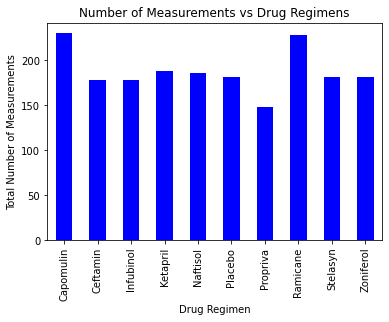

In [4]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas

bar_drug_pan = total_volume.plot(x = regimens, y = total_volume, 
                                 kind="bar", color='blue', 
                                 title = "Number of Measurements vs Drug Regimens")

plt.ylabel("Total Number of Measurements")
plt.show()

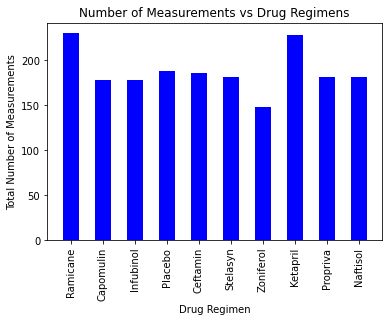

In [5]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

bar_drug_py = plt.bar(regimens, total_volume, color ="blue", 
                       width = .5)

plt.title("Number of Measurements vs Drug Regimens")
plt.xticks(rotation = 90)
plt.xlabel("Drug Regimen")
plt.ylabel("Total Number of Measurements")
plt.show()

In [6]:
# Sorted the genders alphabetically and get the genders

sex_sort = clean_mouse_results.sort_values(by=['Sex'])
sex = sex_sort['Sex'].unique()

# Get the number of the mice with a particular gender

sex_group = clean_mouse_results.groupby(['Sex'])
sex_count = sex_group['Sex'].count()

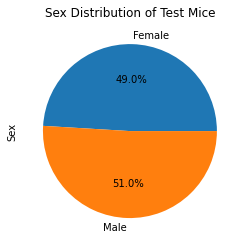

In [7]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

pie_sex_pan = sex_count.plot(y = sex_count, kind = "pie", 
                             title = "Sex Distribution of Test Mice", 
                             autopct = '%1.1f%%')

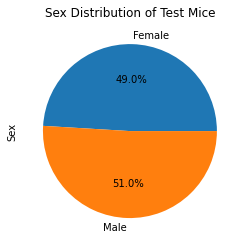

In [8]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

pie_sex_py = plt.pie(sex_count, labels = sex, autopct = '%1.1f%%')

plt.title("Sex Distribution of Test Mice")
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [9]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

mouse_max_time = pd.DataFrame(clean_mouse_results.groupby(["Mouse ID"])["Timepoint"].max())

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

mouse_max_tumor = pd.merge(clean_mouse_results,mouse_max_time.reset_index(),
                             on = ["Mouse ID", "Timepoint"], how = "inner")

In [10]:
# Put treatments into a list for for loop (and later for plot labels)
top_regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
top_regimens

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

#For loop the get the final tumor volumes of the Top Regimens

for drug in top_regimens:
    drug_results = mouse_max_tumor.loc[mouse_max_tumor["Drug Regimen"] == drug]
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
  
    final_tumor_volume = drug_results["Tumor Volume (mm3)"]
    
    # Add subset
    
    tumor_volume.append(final_tumor_volume)
    
    # Determine outliers using upper and lower bounds using quartiles
  
    quartiles = final_tumor_volume.quantile([.25, .5, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    
    print(f"The interquartile range of Tumor Volume for {drug} is: {round(iqr,2)}")
    print(f"The values below {round(lower_bound,2)} could be outlier for {drug}")
    print(f"The values above {round(upper_bound,2)} could be outlier for {drug}\n")

The interquartile range of Tumor Volume for Capomulin is: 7.78
The values below 20.7 could be outlier for Capomulin
The values above 51.83 could be outlier for Capomulin

The interquartile range of Tumor Volume for Ramicane is: 9.1
The values below 17.91 could be outlier for Ramicane
The values above 54.31 could be outlier for Ramicane

The interquartile range of Tumor Volume for Infubinol is: 11.48
The values below 36.83 could be outlier for Infubinol
The values above 82.74 could be outlier for Infubinol

The interquartile range of Tumor Volume for Ceftamin is: 15.58
The values below 25.36 could be outlier for Ceftamin
The values above 87.67 could be outlier for Ceftamin



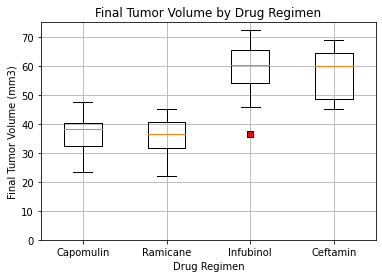

In [11]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

outlier = dict(markerfacecolor = 'r', marker = 's')
fig1,ax1 = plt.subplots()
ax1.boxplot(tumor_volume, labels = top_regimens, showfliers = True, flierprops = outlier)
ax1.set_title("Final Tumor Volume by Drug Regimen")
ax1.set_ylim(0,75)
ax1.set_ylabel("Final Tumor Volume (mm3)")
ax1.set_xlabel("Drug Regimen")
ax1.grid(True)
plt.show()

## Line and Scatter Plots

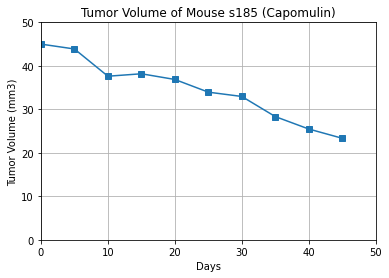

In [12]:
# Get the results of one mouse. Mouse s185

one_mouse_result = clean_mouse_results.loc[clean_mouse_results["Mouse ID"] == "s185"]

# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

plt.plot(one_mouse_result["Timepoint"], one_mouse_result["Tumor Volume (mm3)"], marker = "s")

plt.title("Tumor Volume of Mouse s185 (Capomulin)")
plt.xlabel("Days")
plt.ylabel("Tumor Volume (mm3)")
plt.xlim(0,50)
plt.ylim(0,50)
plt.grid(True)
plt.show()

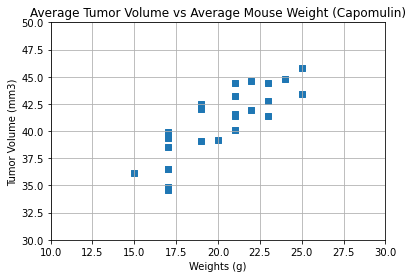

In [13]:
# Get the results of only the drup Capomulin

capomulin = clean_mouse_results.loc[clean_mouse_results["Drug Regimen"] == "Capomulin"]

# Get the mean of Capomulin results

avg_capomulin_group = capomulin.groupby(["Mouse ID"]).mean()

# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

avg_weights = avg_capomulin_group["Weight (g)"]
avg_mm3 = avg_capomulin_group["Tumor Volume (mm3)"]

plt.scatter(avg_weights, avg_mm3 ,marker = "s")

plt.title("Average Tumor Volume vs Average Mouse Weight (Capomulin)")
plt.xlabel("Weights (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.xlim(10,30)
plt.ylim(30,50)
plt.grid(True)

plt.show()

## Correlation and Regression

In [14]:
# Calculate the correlation coefficient

r = st.pearsonr(avg_weights, avg_mm3)
r = r[0]**2

print(f'The correlation coefficient of the average Tumor Volume vs average Mouse Weight is {round(r,2)}\n')

# Calculate the linear regression model for mouse weight and average tumor volume for the Capomulin regimen

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(avg_weights, avg_mm3)
regress_values = avg_weights * slope + intercept
line_eq = f' y = {round(slope,2)} x + {round(intercept,2)}'

print(line_eq)

The correlation coefficient of the average Tumor Volume vs average Mouse Weight is 0.71

 y = 0.95 x + 21.55


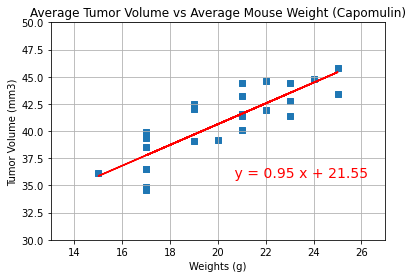

In [15]:
# Generate a scatter plot of the average tumor volume vs. mouse weight
# with the linear regression line and equation

plt.plot(avg_weights,regress_values, "r-")
plt.scatter(avg_weights, avg_mm3 ,marker = "s")

plt.title("Average Tumor Volume vs Average Mouse Weight (Capomulin)")
plt.xlabel("Weights (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.xlim(13,27)
plt.ylim(30,50)
plt.grid(True)
plt.annotate(line_eq, (20.5,35.75), fontsize = 14, color ="r")

plt.show()